In [1]:
from sklearn.preprocessing import scale # 데이터 스케일링
from sklearn.datasets import load_iris  # iris 데이터셋
from sklearn.cluster import KMeans      # 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지


In [2]:

iris= load_iris()
iris_df = pd.DataFrame(
    data = iris.data,               # 입력 특성 X
    columns= iris.feature_names,    # 특성 이름
)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- init 옵션
    - k-means++ (기본값, 가장 권장)
        - 첫 중심은 랜덤, 이후는 이미 선택된 중심과 멀리 떨어진 데이터를 우선 선택하여 중심정이 잘 퍼지도록 보장하는 방식
    - random
        - 데이터 포인트 중에서 무작위로 k개를 선택
        - 결과가 불안할 가능성이 있다.
    - 커스텀 방식(고급)
        - 도메인을 다르게 적용해준다.
        - 성능이 좋지 않을 가능성이 있다.

In [3]:
kemans_model = KMeans(
    n_clusters=3,           # 군집 개수 (분류 클래스 수)
    init = "k-means++",     # 초기 중심점 설정 방식
    max_iter=300,           # 최대 반복 횟수
    random_state= 0,
)
kemans_model.fit(iris_df)   # K-Means모델 학습

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",0
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [4]:
kemans_model.labels_    # K-Means가 학습한 결과. 어떤 군집에 속하는지 군집번호로 확인

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [5]:
iris_df['cluster'] = kemans_model.labels_   # K-Means로 할당된 군집 번호
iris_df['target'] = iris.target             # 실제 클래스 라벨

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,0,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [6]:
iris_df['cluster'].value_counts()   # 군집별 데이터 갯수 확인 (실제 라벨과는 11개 차이)

cluster
0    61
1    50
2    39
Name: count, dtype: int64

In [7]:
iris_df['target'].value_counts()    # 실제 데이터의 군집별 데이터 갯수 확인

target
0    50
1    50
2    50
Name: count, dtype: int64

In [8]:
# 4차원 특성은 시각화가 안되므로 2차원으로 축소해서 본다.
from sklearn.decomposition import PCA

pca =PCA(n_components=2)    # 2차원으로 축소
pca_trasformed = pca.fit_transform(iris_df.iloc[:, 0:4]) # 원본 4개 특성

pca_trasformed

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [9]:
iris_df['pca_x'] = pca_trasformed[:,0]      # 첫 번쨰 주성분 좌표
iris_df['pca_y'] = pca_trasformed[:,1]      # 두 번쨰 주성분 좌표

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,0,2,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


In [10]:
marker0 = iris_df[iris_df['cluster'] == 0].index    # 군집 0에 속한 데이터의 인덱스 추출
marker0

Index([ 51,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 101, 106, 113, 114, 119, 121, 123, 126, 127,
       133, 138, 142, 146, 149],
      dtype='int64')

In [11]:
marker1 = iris_df[iris_df['cluster'] == 1].index    # 군집1에 속한 데이터의 인덱스 추출
marker1

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype='int64')

In [12]:
marker2 = iris_df[iris_df['cluster'] == 2].index    # 군집2에 속한 데이터의 인덱스 추출
marker2

Index([ 50,  52,  77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112,
       115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134,
       135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148],
      dtype='int64')

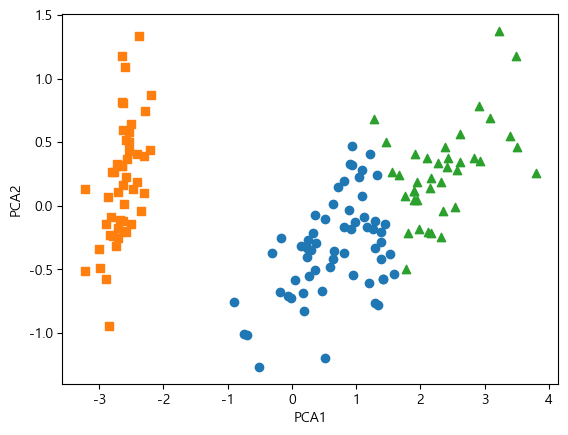

In [13]:
# 산점도 그래프로 시각화
plt.scatter(
    x = iris_df.loc[marker0 , 'pca_x'],
    y = iris_df.loc[marker0 , 'pca_y'],
    marker = 'o'
)   # 군집 0 산점도
plt.scatter(
    x = iris_df.loc[marker1 , 'pca_x'],
    y = iris_df.loc[marker1 , 'pca_y'],
    marker = 's'
)   # 군집 1 산점도
plt.scatter(
    x = iris_df.loc[marker2 , 'pca_x'],
    y = iris_df.loc[marker2 , 'pca_y'],
    marker = '^'
)   # 군집 2 산점도

plt.xlabel("PCA1")  # x축 이름 : 첫번째 주성분
plt.ylabel("PCA2")  # y축 이름 : 두번째 주성분
plt.show()

In [14]:
# 2차원 데이터 생성해서 사용한다.
from sklearn.datasets import make_blobs

X,y = make_blobs(
    n_samples=200,      # 생성할 데이터 갯수
    n_features=2,       # 특성 갯수(2차원)
    centers=3,          # 군집 갯수
    cluster_std=0.9,    # 군집 퍼짐 정도
    shuffle=True,       # 데이터 섞음
    random_state=0
)

X

array([[-1.71311732,  3.71004328],
       [ 0.66314914,  4.4445014 ],
       [ 1.11572276,  4.6441336 ],
       [-1.43895154,  3.44254057],
       [ 1.24468444,  5.49753463],
       [-0.83097633,  1.85238969],
       [ 2.52422591,  0.37945449],
       [ 1.60703832,  2.63424251],
       [ 1.09049096,  4.66557775],
       [-1.69849216,  2.5625177 ],
       [ 0.61341083,  5.40398789],
       [-0.90250818,  2.77426617],
       [ 1.66120403,  4.41329484],
       [ 1.33267612,  3.32003197],
       [ 0.15970155,  4.35053818],
       [-1.01634276,  2.71747467],
       [ 2.76296269,  0.47788647],
       [ 2.18302537,  0.61026808],
       [ 0.24443842,  2.75013299],
       [-3.35452003,  4.77592584],
       [-1.00623467,  3.23257127],
       [ 1.38498818,  0.15386898],
       [ 1.01745274,  4.13532186],
       [ 1.82879685,  4.16427824],
       [-3.55691182,  1.9976261 ],
       [-0.47623798,  4.11232108],
       [ 1.47601096, -1.10339918],
       [-2.21463354,  1.62386993],
       [-0.75477248,

In [15]:
y

array([2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1,
       0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 1])

In [16]:
cluster_df = pd.DataFrame(
    data = X,
    columns= ['ftr1', 'ftr2']   # 컬럼 이름
)
cluster_df['target'] = y

cluster_df

,ftr1,ftr2,target
0,-1.713117,3.710043,2
1,0.663149,4.444501,0
2,1.115723,4.644134,0
3,-1.438952,3.442541,2
4,1.244684,5.497535,0
...,...,...,...
195,3.069240,-0.074275,1
196,-2.142514,4.411478,2
197,2.874429,1.183160,1
198,1.258031,3.535101,0


C:\Users\Playdata\AppData\Local\Temp\ipykernel_16088\3616969266.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  marker0 = iris_df[cluster_df['target'] == 0].index
C:\Users\Playdata\AppData\Local\Temp\ipykernel_16088\3616969266.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  marker1 = iris_df[cluster_df['target'] == 1].index
C:\Users\Playdata\AppData\Local\Temp\ipykernel_16088\3616969266.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  marker2 = iris_df[cluster_df['target'] == 2].index


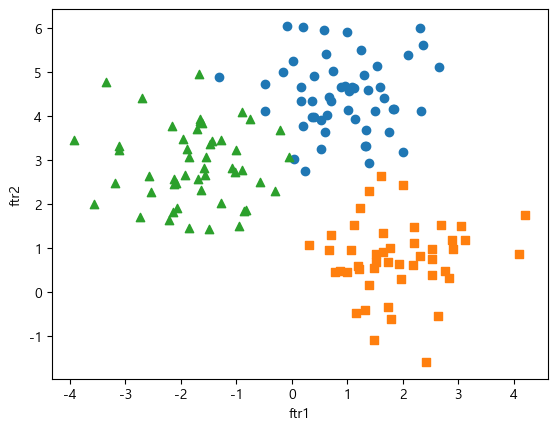

In [17]:
marker0 = iris_df[cluster_df['target'] == 0].index 
marker1 = iris_df[cluster_df['target'] == 1].index 
marker2 = iris_df[cluster_df['target'] == 2].index 

# 산점도 그래프로 시각화
plt.scatter(
    x = cluster_df.loc[marker0 , 'ftr1'],
    y = cluster_df.loc[marker0 , 'ftr2'],
    marker = 'o'
)   # 군집 0 산점도
plt.scatter(
    x = cluster_df.loc[marker1 , 'ftr1'],
    y = cluster_df.loc[marker1 , 'ftr2'],
    marker = 's'
)   # 군집 1 산점도
plt.scatter(
    x = cluster_df.loc[marker2 , 'ftr1'],
    y = cluster_df.loc[marker2 , 'ftr2'],
    marker = '^'
)   # 군집 2 산점도

plt.xlabel("ftr1")
plt.ylabel("ftr2")
plt.show()

In [ ]:
kemans_model = KMeans(
    n_clusters=3,       # 군집 갯수
    init='k-means++',   # 초기 중심점 설정 방시
    max_iter=300,       # 최대반복 횟수
    random_state=0
)

kemans_model.fit(
    cluster_df.drop("target",axis=1)
)   # 실제 라벨은 제외하고 군집 학습

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",0
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [19]:
kemans_model.labels_    # 데이터가 할당된 군집 번호

array([2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 0,
       1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 0, 1, 0, 0, 2, 0, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 2,
       0, 0, 2, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 1, 2,
       1, 0, 2, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0,
       1, 2, 0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1, 2, 0,
       0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 0, 2, 2, 2,
       1, 0, 0, 0, 1, 1, 0, 2, 2, 2, 1, 1, 0, 2, 0, 0, 2, 0, 1, 0, 2, 2,
       1, 2, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 0,
       1, 0], dtype=int32)

In [20]:
cluster_df['cluster'] = kemans_model.labels_    # K-Means로 할당된 군집 번호 추가
cluster_df

,ftr1,ftr2,target,cluster
0,-1.713117,3.710043,2,2
1,0.663149,4.444501,0,1
2,1.115723,4.644134,0,1
3,-1.438952,3.442541,2,2
4,1.244684,5.497535,0,1
...,...,...,...,...
195,3.069240,-0.074275,1,0
196,-2.142514,4.411478,2,2
197,2.874429,1.183160,1,0
198,1.258031,3.535101,0,1


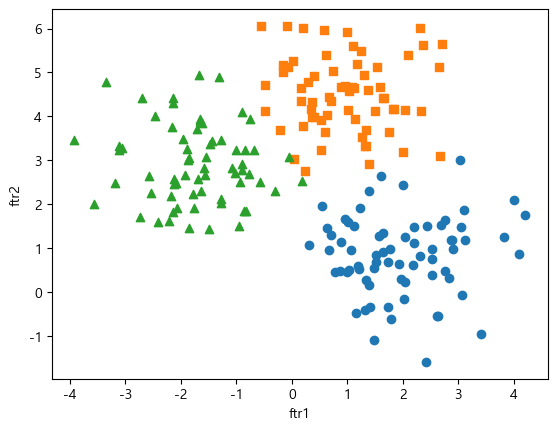

In [21]:
marker0 = cluster_df[cluster_df['cluster'] == 0].index 
marker1 = cluster_df[cluster_df['cluster'] == 1].index 
marker2 = cluster_df[cluster_df['cluster'] == 2].index 

# 산점도 그래프로 시각화
plt.scatter(
    x = cluster_df.loc[marker0 , 'ftr1'],
    y = cluster_df.loc[marker0 , 'ftr2'],
    marker = 'o'
)   # 군집 0 산점도
plt.scatter(
    x = cluster_df.loc[marker1 , 'ftr1'],
    y = cluster_df.loc[marker1 , 'ftr2'],
    marker = 's'
)   # 군집 1 산점도
plt.scatter(
    x = cluster_df.loc[marker2 , 'ftr1'],
    y = cluster_df.loc[marker2 , 'ftr2'],
    marker = '^'
)   # 군집 2 산점도

plt.xlabel("ftr1")
plt.ylabel("ftr2")
plt.show()

In [22]:
# 실루엣 분석
from sklearn.metrics import silhouette_samples, silhouette_score    # 실루엣 지표
from sklearn.cluster import KMeans

iris_df = pd.DataFrame(
    data=iris.data,
    columns=iris.feature_names,
)

kemans_model = KMeans(
    n_clusters=3,
    init="k-means++",
    max_iter=300,
    random_state=0
)

kemans_model.fit(iris_df)
iris_df['cluster'] = kemans_model.labels_   # 군집결과 추가

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
